In [1]:
# Learned how to use json to get the current citibke status
import requests
import json
import pandas as pd

# Public json url from Citibike
stations_url = 'https://feeds.citibikenyc.com/stations/stations.json'

# Request the response and parse the json
resp = requests.get(url=stations_url)
data = resp.json()

In [2]:
# Show a sample of the json dicts
# The Citibike Station json returns a list of dicts
data['stationBeanList'][0]

{'id': 298,
 'stationName': '3 Ave & Schermerhorn St',
 'availableDocks': 11,
 'totalDocks': 35,
 'latitude': 40.68683208,
 'longitude': -73.9796772,
 'statusValue': 'In Service',
 'statusKey': 1,
 'availableBikes': 24,
 'stAddress1': '3 Ave & Schermerhorn St',
 'stAddress2': '',
 'city': '',
 'postalCode': '',
 'location': '',
 'altitude': '',
 'testStation': False,
 'lastCommunicationTime': '2019-07-07 04:58:50 PM',
 'landMark': ''}

In [3]:
# Process the list of dictionary into DataFrame
station_df = pd.DataFrame(data['stationBeanList'])

In [4]:
# Show the list of columns in the DataFrame
station_df.columns

Index(['altitude', 'availableBikes', 'availableDocks', 'city', 'id',
       'landMark', 'lastCommunicationTime', 'latitude', 'location',
       'longitude', 'postalCode', 'stAddress1', 'stAddress2', 'stationName',
       'statusKey', 'statusValue', 'testStation', 'totalDocks'],
      dtype='object')

In [5]:
# Preview the DataFrame
station_df.head(5)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,24,11,,298,,2019-07-07 04:58:50 PM,40.686832,,-73.979677,,3 Ave & Schermerhorn St,,3 Ave & Schermerhorn St,1,In Service,False,35
1,,19,11,,307,,2019-07-07 05:00:13 PM,40.714275,,-73.989900,,Canal St & Rutgers St,,Canal St & Rutgers St,1,In Service,False,30
2,,12,37,,358,,2019-07-07 05:02:04 PM,40.732916,,-74.007114,,Christopher St & Greenwich St,,Christopher St & Greenwich St,1,In Service,False,50
3,,24,3,,426,,2019-07-07 05:00:00 PM,40.717548,,-74.013221,,West St & Chambers St,,West St & Chambers St,1,In Service,False,29
4,,6,25,,432,,2019-07-07 05:01:29 PM,40.726218,,-73.983799,,E 7 St & Avenue A,,E 7 St & Avenue A,1,In Service,False,31


In [6]:
station_df = station_df[['id', 
                         'stationName',
                         'availableBikes', 
                         'availableDocks', 
                         'totalDocks',
                         'statusValue']]

In [7]:
station_df.sort_values(by='availableBikes', 
                             ascending=False)
station_df.head(10)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
0,298,3 Ave & Schermerhorn St,24,11,35,In Service
1,307,Canal St & Rutgers St,19,11,30,In Service
2,358,Christopher St & Greenwich St,12,37,50,In Service
3,426,West St & Chambers St,24,3,29,In Service
4,432,E 7 St & Avenue A,6,25,31,In Service
5,438,St Marks Pl & 1 Ave,20,26,47,In Service
6,487,E 20 St & FDR Drive,3,31,34,In Service
7,504,1 Ave & E 16 St,9,44,53,In Service
8,532,S 5 Pl & S 5 St,16,26,43,In Service
9,3092,Berry St & N 8 St,10,17,27,In Service


In [8]:
# Create a boolean array mask where there are no bikes
# Make sure the station is in service right now.
in_service_mask = (station_df['statusValue'] == 'In Service')

# Active station only
active_station = station_df[in_service_mask]

# Find out which station has no bike avaliable
zero_bike_mask = (active_station['availableBikes'] == 0)

# Apply the zero_bike_mask
zero_bike = active_station[zero_bike_mask]

# Sample the output
zero_bike.sample(5)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
748,3623,W 120 St & Claremont Ave,0,39,39,In Service
666,3539,W 116 St & Amsterdam Ave,0,43,43,In Service
510,3338,2 Ave & E 99 St,0,31,31,In Service
687,3562,Classon Ave & St Marks Ave,0,27,27,In Service
840,3787,Dock 72 Way & Market St,0,22,22,In Service


# Question: How many stations are without bike?

In [9]:
# Get the count of stations without bikes
num_of_stations_without_bike = zero_bike['id'].count()
print('There are {0:,} stations without bike!'.format(
    num_of_stations_without_bike))

There are 43 stations without bike!


In [10]:
# Find out which station has no dock avaliable
zero_dock_mask = (active_station['availableDocks'] == 0)

# Apply the zero_dock_mask
zero_dock = active_station[zero_dock_mask]

zero_dock.sample(5)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
558,3390,E 109 St & 3 Ave,23,0,24,In Service
797,3720,Wyckoff St & Bond St,23,0,23,In Service
50,248,Laight St & Hudson St,21,0,23,In Service
612,3477,39 St & 2 Ave - Citi Bike HQ at Industry City,32,0,33,In Service
182,427,Bus Slip & State St,46,0,47,In Service


# Question: How many stations are without a dock?

In [11]:
num_of_stations_without_dock = zero_dock['id'].count()
print('There are {0:,} stations without dock!'.format(
    num_of_stations_without_dock))

There are 47 stations without dock!


In [12]:
total = active_station.shape[0]
no_dock = num_of_stations_without_dock
no_bike = num_of_stations_without_bike

In [13]:
arr = pd.Series([no_dock, no_bike, total],
                dtype='int64',
                index=['No Dock', 'No Bike', 'Active (Has Both)'])

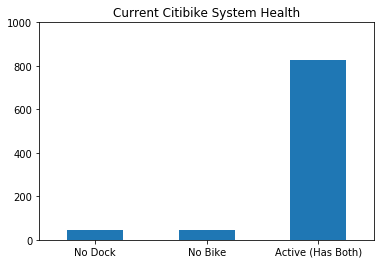

In [15]:
arr.plot(kind='bar', rot=0,
         ylim=(0, 1000),
         title='Current Citibike System Health')